In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

In [3]:
data = fetch_olivetti_faces()

In [4]:
images = data.images.reshape(400, 64*64)

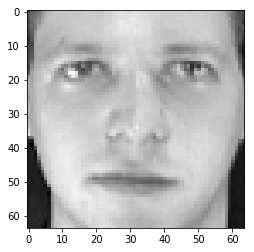

In [5]:
plt.imshow(images[0].reshape(64,64), cmap='gray');

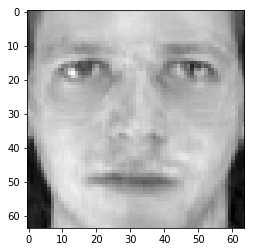

In [165]:
images_mean = images.mean(axis=0)
images_norm = images - images_mean

u, s, vh = np.linalg.svd(images_norm)

images_redux_1 = images_norm@vh[:200].T@vh[:200] + images_mean
plt.imshow(images_redux_1[0].reshape(64,64), cmap='gray');

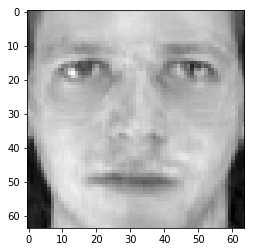

In [166]:
pca = PCA(200, svd_solver='full')
pca.fit(images)
images_redux_2 = pca.inverse_transform(pca.transform(images))
plt.imshow(images_redux_2[0].reshape(64,64), cmap='gray');

In [167]:
images_redux_1[0], images_redux_2[0]

(array([0.3211093 , 0.3975074 , 0.41935626, ..., 0.16040857, 0.13786691,
        0.17944448], dtype=float32),
 array([0.3211097 , 0.39750725, 0.41935655, ..., 0.16040903, 0.13786691,
        0.17944391], dtype=float32))

In [168]:
images_mean = images.mean(axis=0)

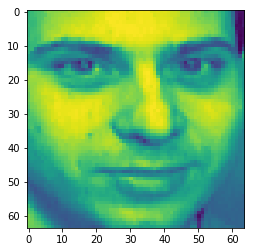

In [169]:
face_idx = 89
pca = PCA(100)
pca.fit(images[1:])
weights = pca.transform(np.vstack((images[:face_idx],images[face_idx+1:])))
im0_weights = pca.transform(images[face_idx].reshape(1,-1))

plt.imshow(images[face_idx].reshape(64,64));

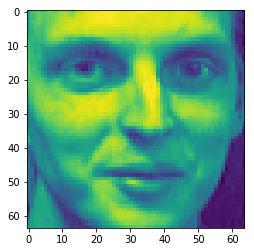

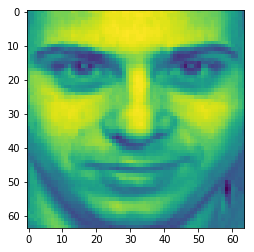

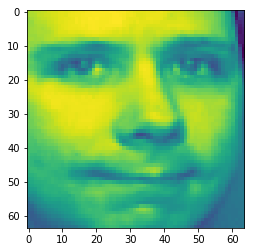

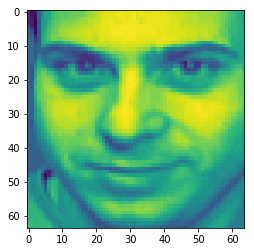

In [130]:
nn = NearestNeighbors(4)
nn.fit(weights)
dist, indices = nn.kneighbors(im0_weights)

for i in indices[0]:
    plt.figure()
    plt.imshow(images[i+1].reshape(64,64))

In [173]:
np.random.randint(1,100, 12)

array([19,  4, 41, 50, 43, 40, 70,  1, 76, 82, 78, 71])

In [176]:
A = np.random.randint(1,100,18).reshape(6,3)
A_norm = A - A.mean(axis=0)
A_norm

array([[-38.16666667, -23.16666667, -50.33333333],
       [  0.83333333, -17.16666667,  30.66666667],
       [-16.16666667,  34.83333333,  -8.33333333],
       [ 32.83333333,  -4.16666667, -50.33333333],
       [-23.16666667,  27.83333333,  45.66666667],
       [ 43.83333333, -18.16666667,  32.66666667]])

In [182]:
np.linalg.eig(np.cov(A, rowvar=False))

(array([ 451.83112356, 1169.22645453, 1909.14242191]),
 array([[-0.42842458, -0.89348756,  0.13465643],
        [-0.87991012,  0.44642901,  0.16266322],
        [ 0.2054521 ,  0.04879663,  0.97744991]]))

In [185]:
np.linalg.svd(A - A.mean(0))

(array([[ 0.5947265 ,  0.27861721, -0.55532745,  0.24049429,  0.07441038,
          0.44374526],
        [-0.27936904, -0.09039812, -0.44284408,  0.68785017, -0.15353537,
         -0.47006304],
        [ 0.04765769,  0.38698255,  0.53515249,  0.43872859, -0.56628533,
          0.22005276],
        [ 0.46523901, -0.44013067,  0.43638024,  0.43513039,  0.44457872,
         -0.11145068],
        [-0.47127718,  0.46237397,  0.10905295,  0.24656008,  0.66105221,
          0.2333103 ],
        [-0.35697698, -0.59744493, -0.08241414,  0.16251627, -0.12478241,
          0.68326621]]),
 array([97.70216021, 76.4600044 , 47.53057561]),
 array([[-0.13465643, -0.16266322, -0.97744991],
        [-0.89348756,  0.44642901,  0.04879663],
        [ 0.42842458,  0.87991012, -0.2054521 ]]))

In [186]:
np.linalg.svd(np.cov(A, rowvar=False))

(array([[-0.13465643, -0.89348756,  0.42842458],
        [-0.16266322,  0.44642901,  0.87991012],
        [-0.97744991,  0.04879663, -0.2054521 ]]),
 array([1909.14242191, 1169.22645453,  451.83112356]),
 array([[-0.13465643, -0.16266322, -0.97744991],
        [-0.89348756,  0.44642901,  0.04879663],
        [ 0.42842458,  0.87991012, -0.2054521 ]]))